In [2]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks, savgol_filter
from collections import defaultdict

In [177]:
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 24

plt.rc('font', size=BIGGER_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the figure title

plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams['figure.dpi'] = 75
plt.rcParams['text.usetex'] = True

In [128]:
import glob

filenames = glob.glob("../data/**/*.txt", recursive=True)

In [129]:
df_map = {
    "d": [],
    "l": [],
    "initial_angle": [],
    "period": [],
    "period_std": []
}

for filename in filenames:
    df_file = pd.read_csv(filename, skiprows=1)
    df_file['d'] = savgol_filter(np.hypot(df_file['x'], df_file['y']), 20, 3)
    peaks, _ = find_peaks(df_file['d'], prominence=1)
    periods = np.diff(df_file['t'][peaks[::2]])

    filename_no_path = filename.split("/")[-1]
    d = int(filename_no_path.split("_")[1][:-2])
    l = int(filename_no_path.split("_")[3][:-2])
    initial_angle = int(filename_no_path.split("_")[-1][:-7])

    df_map["d"].append(d)

    df_map["l"].append(l)
    df_map["initial_angle"].append(initial_angle)

    df_map["period"].append(np.average(periods[:5]))
    df_map["period_std"].append(np.std(periods[:5]))

df = pd.DataFrame(df_map)

In [115]:
df[(df['l'] == 100) & (df['d'] == 10)]

,d,l,initial_angle,period,period_std
14,10,100,30,0.374541,0.013808
15,10,100,40,0.413747,0.010682
16,10,100,50,0.447947,0.010079
17,10,100,60,0.466299,0.017177
18,10,100,70,0.489656,0.015061
19,10,100,80,0.482982,0.019810
20,10,100,20,0.349516,0.022905


In [130]:
with open("periods.pickle", "wb") as f:
    pickle.dump(df, f)

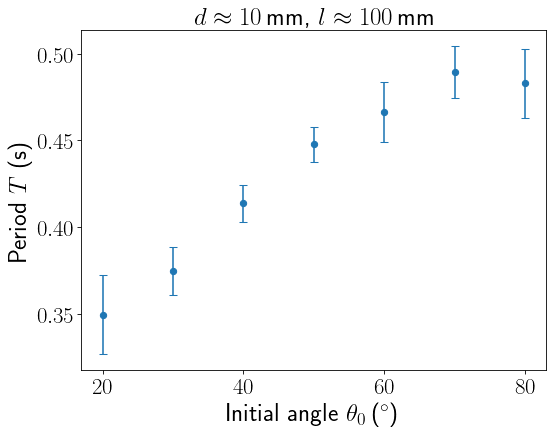

In [178]:
d = 10
l = 100

plot_data = df[(df['l'] == l) & (df['d'] == d)]
plt.errorbar(
    x=plot_data['initial_angle'],
    y=plot_data['period'],
    yerr=plot_data['period_std'],
    linestyle='None',
    marker='o',
    capsize=4,
    # label='experiments'.format(l)
)

# plt.legend()

plt.title("$d \\approx {}\,$mm, $l \\approx {}\,$mm".format(d, l))

plt.xlabel("Initial angle $\\theta_0\\,$($^\circ$)")
plt.ylabel("Period $T$ (s)")

plt.savefig("period_initial_angle_length{}_d{}.png".format(l, d), bbox_inches="tight")

In [10]:
df[(df['l'] == 60) & (df['d'] == 8)]

,d,l,initial_angle,period,period_std
35,8,60,20,0.183517,0.018961
36,8,60,30,0.197697,0.020704
37,8,60,40,0.221054,0.024320
38,8,60,50,0.250250,0.023594
39,8,60,60,0.259426,0.025493
40,8,60,70,0.289456,0.026060
41,8,60,80,0.297798,0.029563


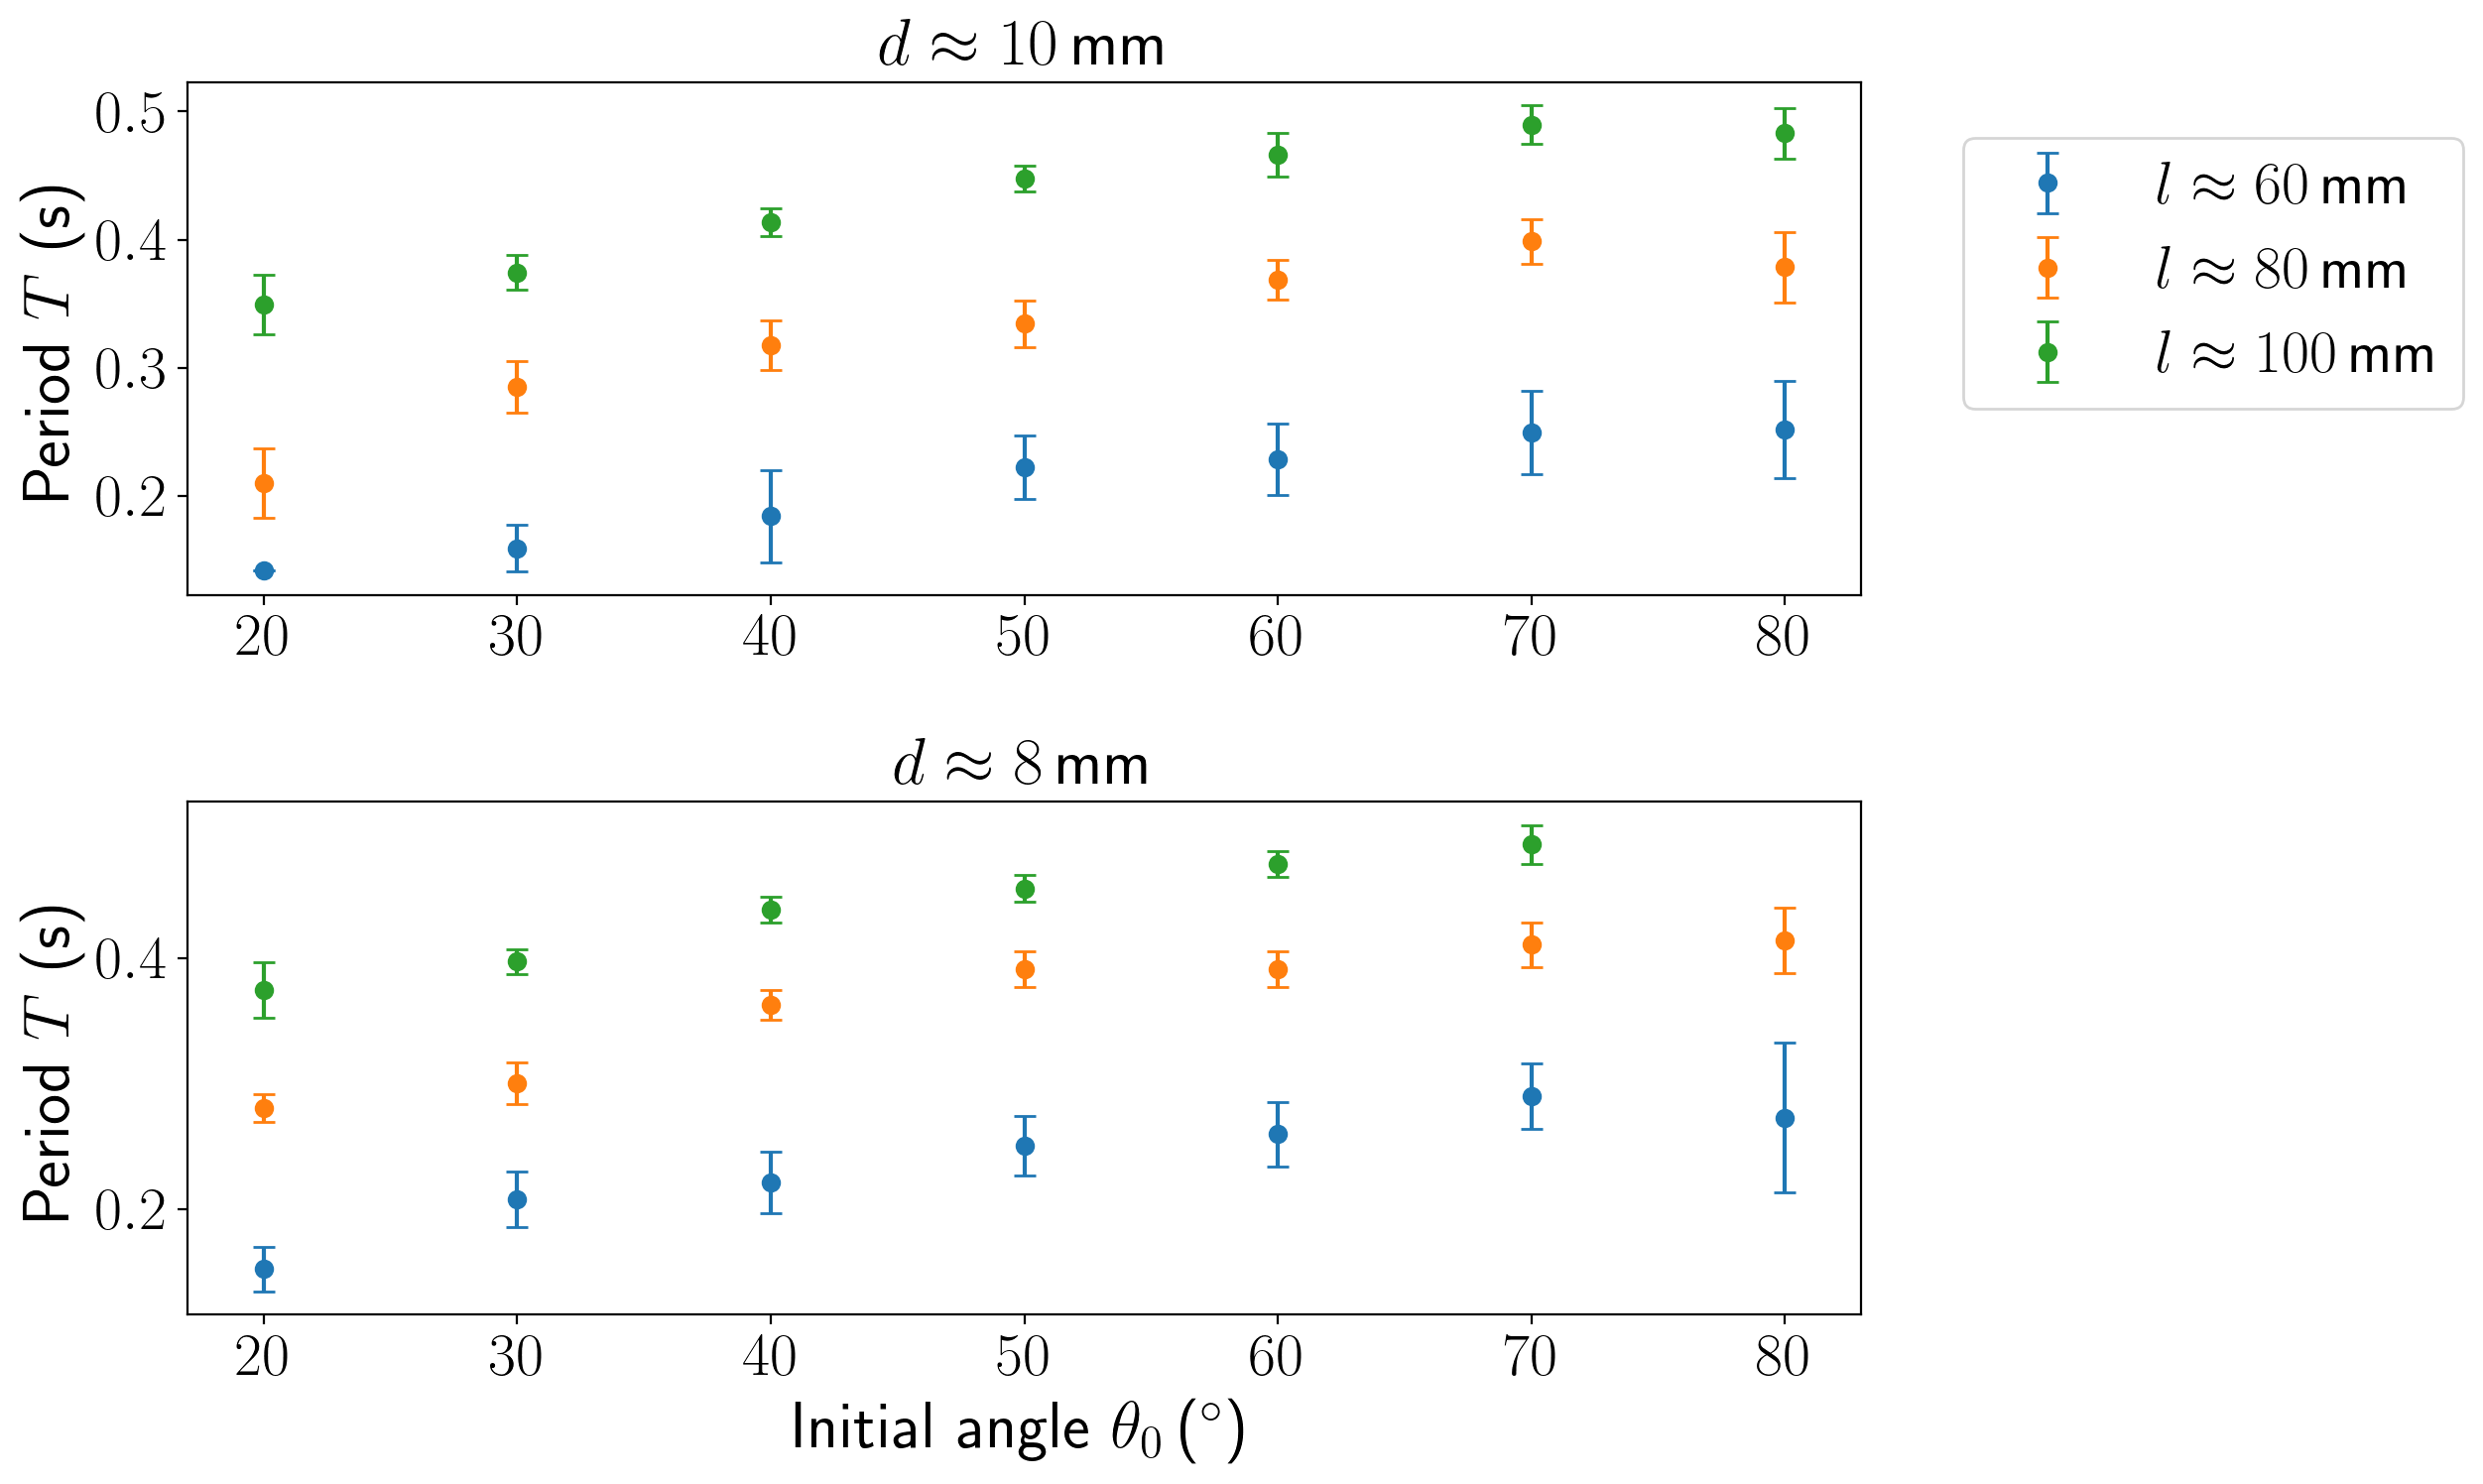

In [176]:
plt.rcParams["figure.figsize"] = (10, 8)
# plt.rcParams["figure.figs ize"] = (8, 6)

d = [10, 8]

fig, axs = plt.subplots(len(d), 1)

if isinstance(axs, plt.Axes):
    axs = [axs]

angles = np.linspace(20, 80, 10)

for i, d_act in enumerate(d):
    for j, l in enumerate(sorted(df['l'].unique())):
        plot_data = df[(df['l'] == l) & (df['d'] == d_act)]
        axs[i].errorbar(
            x=plot_data['initial_angle'],
            y=plot_data['period'],
            yerr=plot_data['period_std'],
            linestyle='None',
            marker='o',
            capsize=4,
            label='$l\\approx{}\,$mm'.format(l)
        )

        # with open("../simulation/d_{}_l_{}_model.pickle".format(d_act, l), "rb") as f:
        #     model_data = pickle.load(f)
        #
        # axs[i].fill_between(angles, model_data[0], model_data[1], alpha=0.2, label='model')
        # axs[i].plot(angles, np.average(model_data, axis=0))

        axs[i].set_title("$d\\approx {}\,$mm".format(d_act))
        if i == len(axs) - 1:
            axs[i].set_xlabel("Initial angle $\\theta_0\\,$($^\circ$)")
        axs[i].set_ylabel("Period $T$ (s)")

plt.tight_layout()

lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels,  loc='upper left',
    bbox_to_anchor=(1, 0.9))

plt.savefig("period_initial_angle_length_d{}_no_model.png".format(d), bbox_inches="tight")

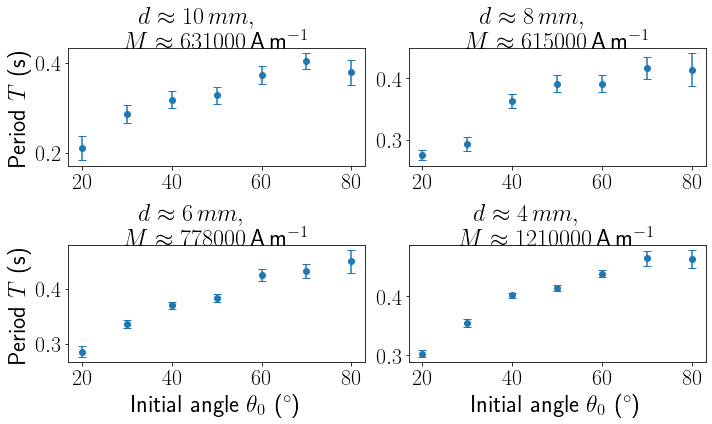

In [14]:
plt.rcParams["figure.figsize"] = (10, 6)

magnetizations = [631000, 615000, 778000, 1210000]

fig, axs = plt.subplots(2, 2)

l = 80

for i, d in enumerate(df['d'].unique()):
    plot_data = df[(df['l'] == l) & (df['d'] == d)]
    axs[i // 2][i % 2].errorbar(
        x=plot_data['initial_angle'],
        y=plot_data['period'],
        yerr=plot_data['period_std'],
        linestyle='None',
        marker='o',
        capsize=4,
        label='$l\\approx{}\,$mm'.format(l)
    )

    axs[i // 2][i % 2].set_title(r"$d\approx {" + str(d) + r"\,}mm, \\ M \approx {" + str(magnetizations[i]) + r"}\,$A$\,$m$^{-1}$")

    if i % 2 == 0:
        axs[i // 2][i % 2].set_ylabel("Period $T$ (s)")
    if i // 2 == 1:
        axs[i // 2][i % 2].set_xlabel("Initial angle $\\theta_0$ ($^\circ$)")

plt.tight_layout()

plt.savefig("period_initial_angle_diameter_l{}.png".format(d), bbox_inches="tight")